In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Loading Results
weighting_models = [
    'tf-idf',
    'okapi-bm25',
    'tw-idf'
]
score_levels = [
    'article',
    'context'
]

In [3]:
data = {}
is_k_column_managed = False

for weighting_model in weighting_models:
    for score_level in score_levels:
        with open(f'results/fquad_context_{weighting_model}_{score_level}_scores.txt', 'r') as score_file:
            column_name = f'{score_level}_{weighting_model}'
            for line in score_file:
                k, score = int(line.split(' ')[0]), float(line.split(' ')[1])
                if not is_k_column_managed:
                    if 'k' in data:
                        data['k'].append(k)
                    else:
                        data['k'] = [k]
                if column_name in data:
                    data[column_name].append(score)
                else:
                    data[column_name] = [score]
            is_k_column_managed = True
            
df = pd.DataFrame(data)

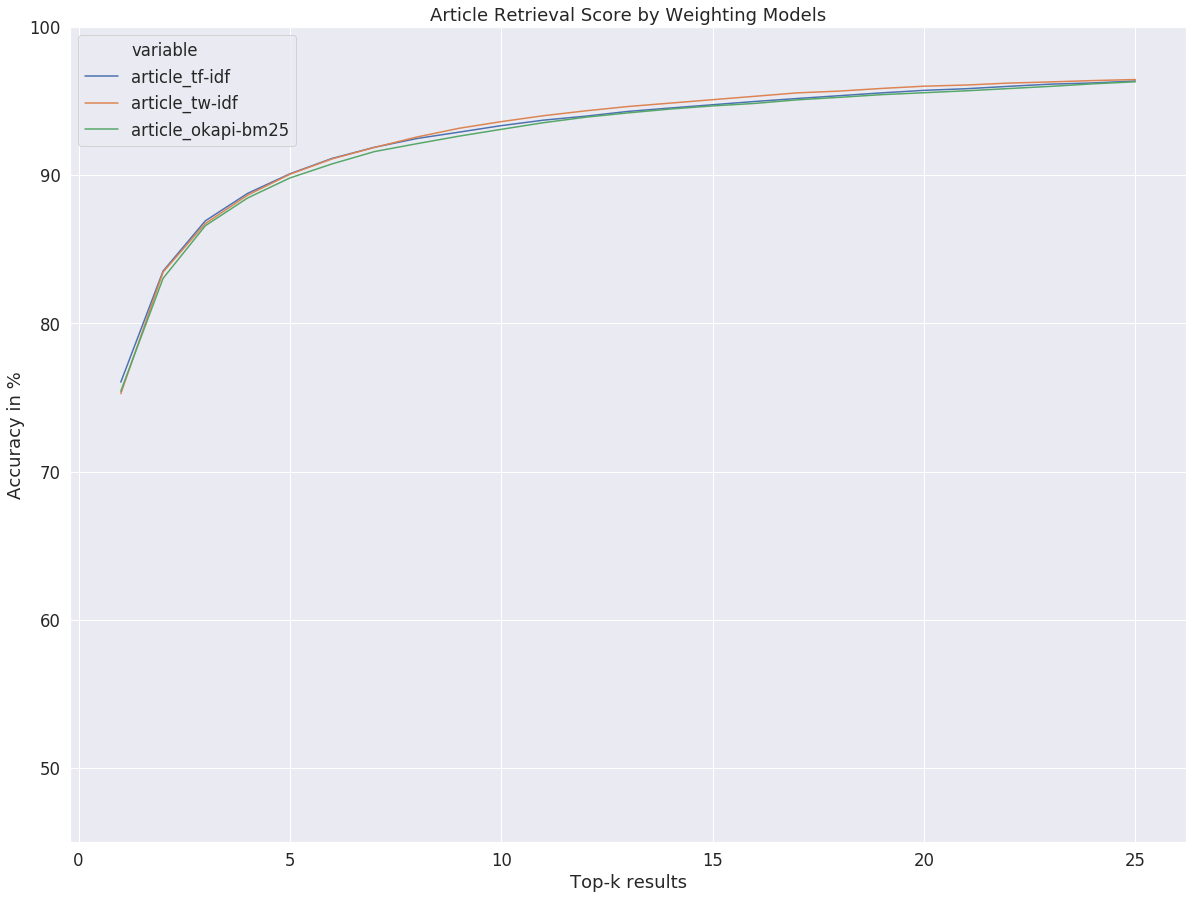

In [55]:
sns.set(rc={'figure.figsize':(20,15)}, font_scale=1.5)
palette = sns.color_palette("mako_r", 6)

g = sns.lineplot(x='k', 
                 y='value',
                 hue='variable', 
                 data=pd.melt(df[['k', 'article_tf-idf', 'article_tw-idf', 'article_okapi-bm25']], ['k']))

g.set(ylim=(45, 100), xlabel='Top-k results', ylabel='Accuracy in %')
g.set_title('Article Retrieval Score by Weighting Models')

fig = g.get_figure()
fig.savefig('article_retrieval_weighting_models.png')

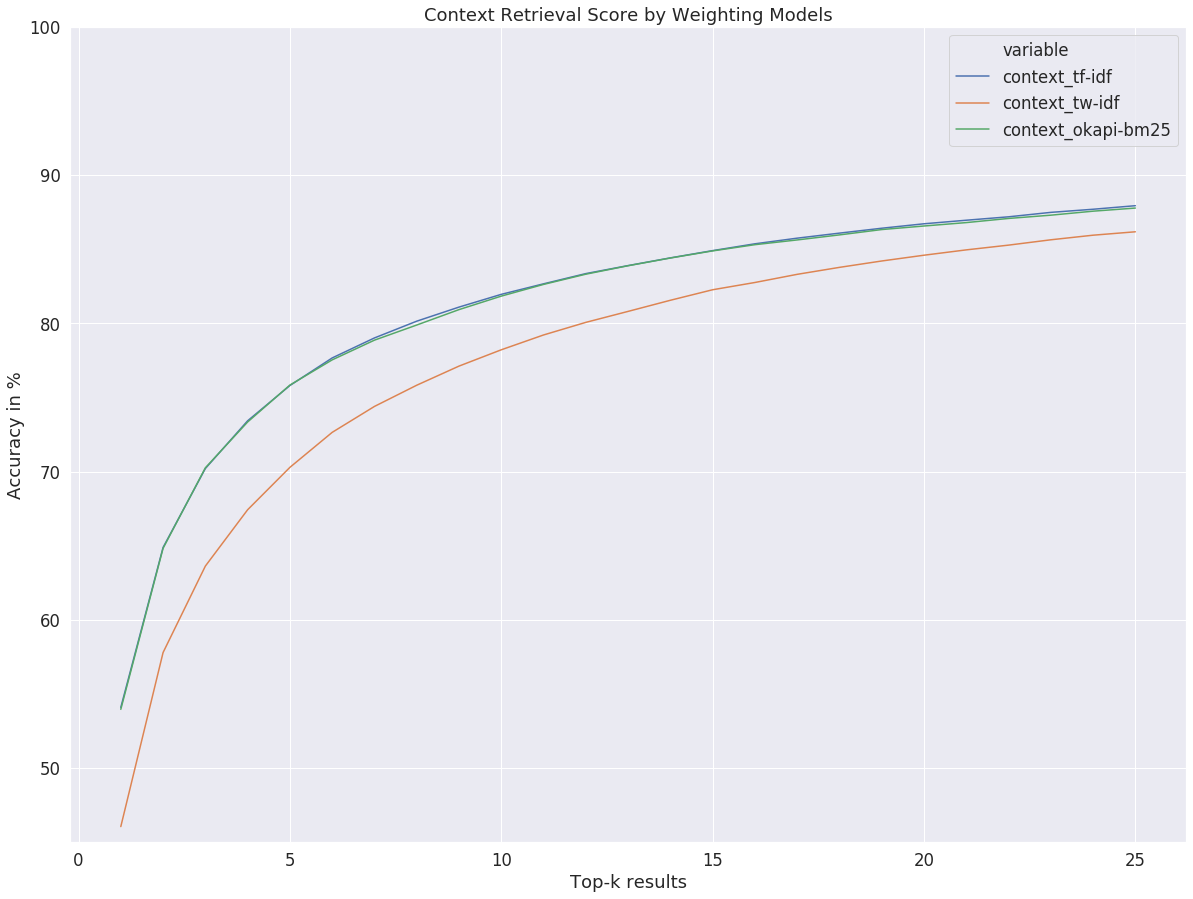

In [54]:
sns.set(rc={'figure.figsize':(20,15)}, font_scale=1.5)
palette = sns.color_palette("mako_r", 6)

g = sns.lineplot(x='k', 
                 y='value',
                 hue='variable', 
                 data=pd.melt(df[['k', 'context_tf-idf', 'context_tw-idf', 'context_okapi-bm25']], ['k']))

g.set(ylim=(45, 100), xlabel='Top-k results', ylabel='Accuracy in %')

g.set_title('Context Retrieval Score by Weighting Models')

fig = g.get_figure()
fig.savefig('context_retrieval_weighting_models.png')

In [3]:
CAMEMBERT_MODELS = [
    'camembert-base',
    'camembert-fine-tuned',
    'camembert-fquad'
]

POOLING_MODES = [
    'mean',
    'cls',
    'max',
    'mean_cls',
    'mean_max',
    'mean_cls_max',
    'cls_max'
]

score_levels = [
    'article',
    'context'
]

data_camembert = {}
is_k_column_managed = False

context_column_names = []
article_column_names = []

for level in score_levels:
    for model in CAMEMBERT_MODELS:
        for pooling_mode in POOLING_MODES:
            try:
                filename = f'results/{model}_{pooling_mode}_fquad_tw-idf_{level}_scores.txt'
                with open(filename, 'r') as score_file:
                    column_name = f'{level}_{model}_{pooling_mode}'
                    if level == 'context':
                        context_column_names.append(column_name)
                    else:
                        article_column_names.append(column_name)
                    for line in score_file:
                        k, score = int(line.split(' ')[0]), float(line.split(' ')[1])
                        if not is_k_column_managed:
                            if 'k' in data_camembert:
                                data_camembert['k'].append(k)
                            else:
                                data_camembert['k'] = [k]
                        if column_name in data_camembert:
                            data_camembert[column_name].append(score)
                        else:
                            data_camembert[column_name] = [score]
                    is_k_column_managed = True
            except FileNotFoundError as e:
                continue
                
df_camembert = pd.DataFrame(data_camembert)

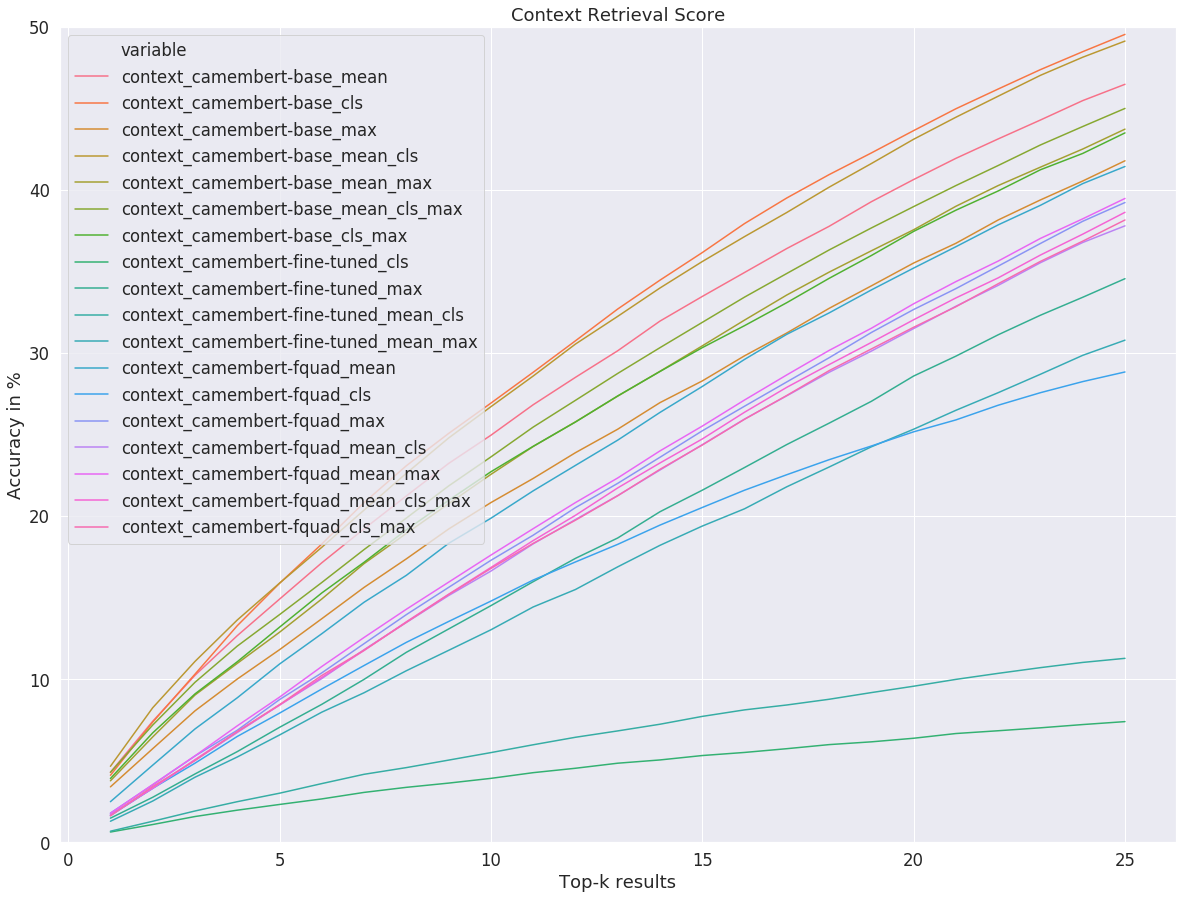

In [7]:
sns.set(rc={'figure.figsize':(20,15)}, font_scale=1.5)
palette = sns.color_palette("mako_r", 6)

g = sns.lineplot(x='k', 
                 y='value',
                 hue='variable', 
                 data=pd.melt(df_camembert[['k'] + context_column_names], ['k']))

g.set(ylim=(0, 50), xlabel='Top-k results', ylabel='Accuracy in %')

g.set_title('Context Retrieval Score')

fig = g.get_figure()
fig.savefig('context_retrieval_camembert.png')

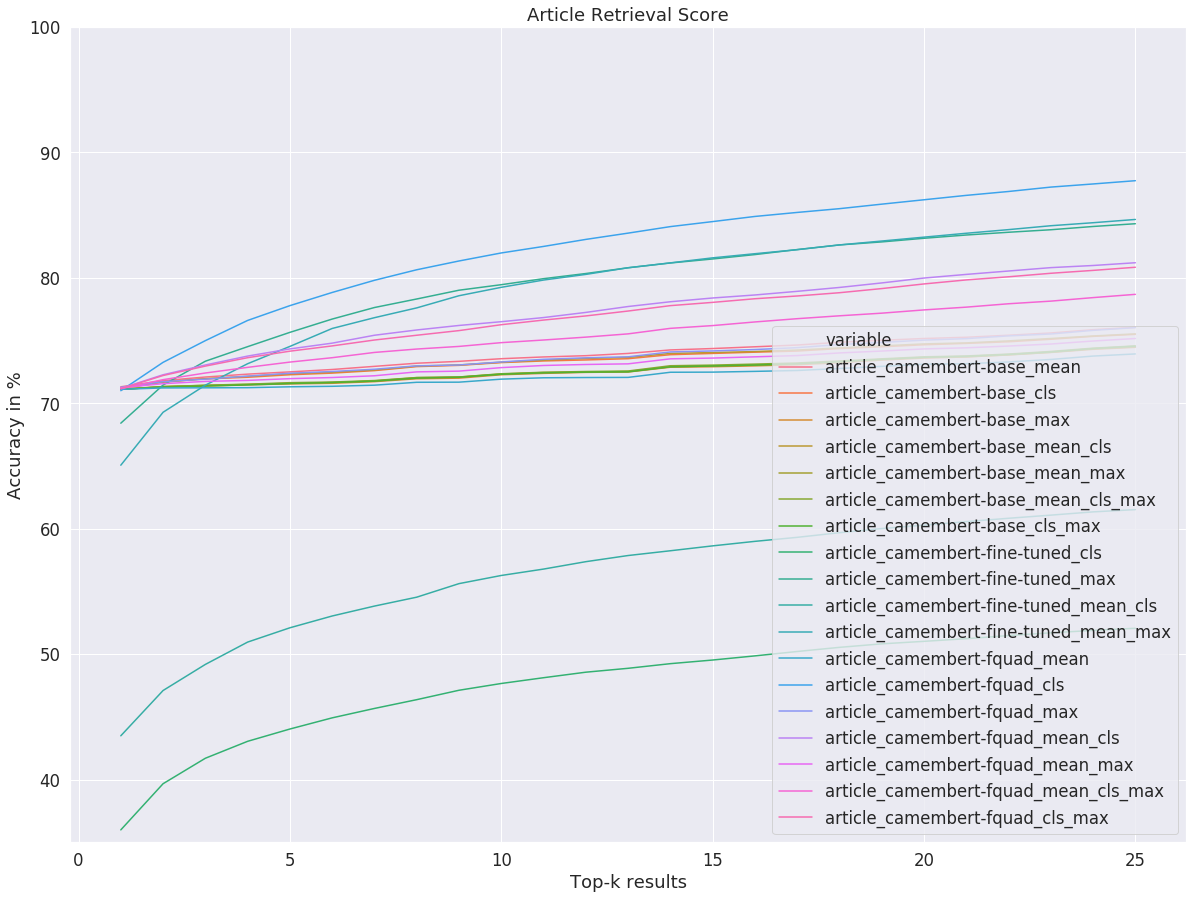

In [9]:
sns.set(rc={'figure.figsize':(20,15)}, font_scale=1.5)
palette = sns.color_palette("mako_r", 6)

g = sns.lineplot(x='k', 
                 y='value',
                 hue='variable', 
                 data=pd.melt(df_camembert[['k'] + article_column_names], ['k']))

g.set(ylim=(35, 100), xlabel='Top-k results', ylabel='Accuracy in %')

g.set_title('Article Retrieval Score')

fig = g.get_figure()
fig.savefig('article_retrieval_camembert.png')

In [10]:
df_camembert[['article_camembert-fquad_cls', 'context_camembert-base_cls']]

,article_camembert-fquad_cls,context_camembert-base_cls
0,71.00,4.11
1,73.26,7.37
2,74.99,10.31
3,76.60,13.28
4,77.78,15.88
5,78.83,18.29
6,79.80,20.83
7,80.64,23.09
8,81.34,25.07
9,81.98,26.93


In [15]:
final_df = pd.concat([df, df_camembert[['article_camembert-fquad_cls', 'context_camembert-base_cls']]], axis=1)

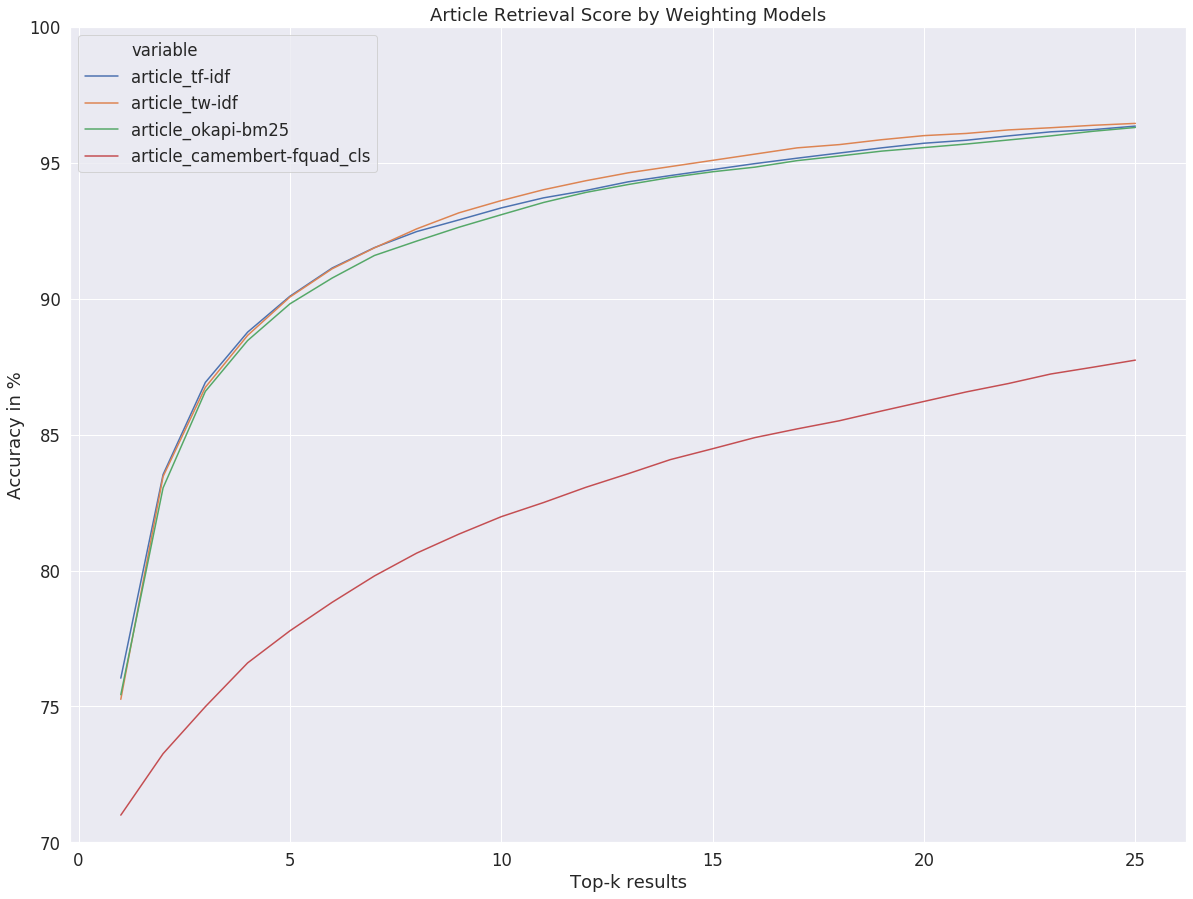

In [18]:
sns.set(rc={'figure.figsize':(20,15)}, font_scale=1.5)
palette = sns.color_palette("mako_r", 6)

g = sns.lineplot(x='k', 
                 y='value',
                 hue='variable', 
                 data=pd.melt(final_df[['k', 'article_tf-idf', 'article_tw-idf', 'article_okapi-bm25', 'article_camembert-fquad_cls']], ['k']))

g.set(ylim=(70, 100), xlabel='Top-k results', ylabel='Accuracy in %')
g.set_title('Article Retrieval Score by Weighting Models')

fig = g.get_figure()
fig.savefig('article_camembert_vs_retrieval.png')

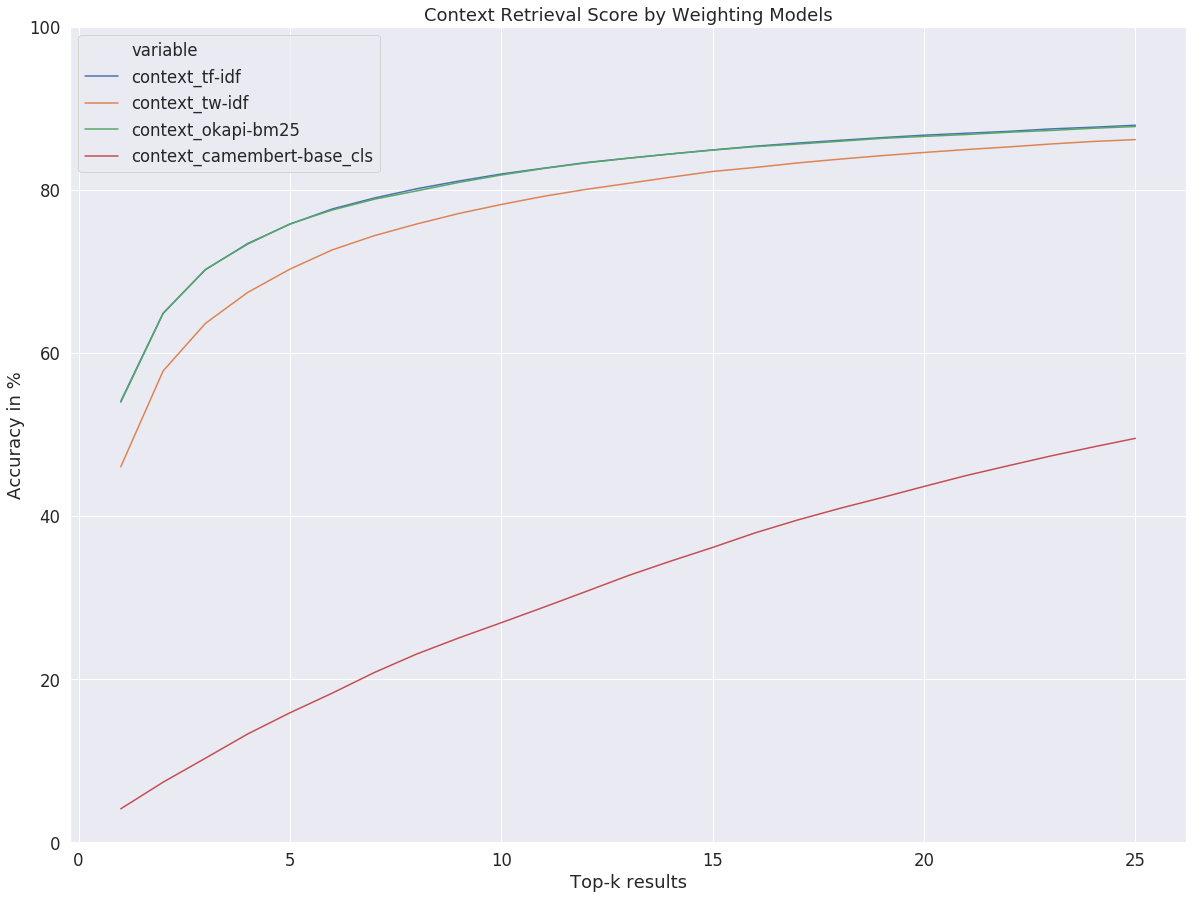

In [20]:
sns.set(rc={'figure.figsize':(20,15)}, font_scale=1.5)
palette = sns.color_palette("mako_r", 6)

g = sns.lineplot(x='k', 
                 y='value',
                 hue='variable', 
                 data=pd.melt(final_df[['k', 'context_tf-idf', 'context_tw-idf', 'context_okapi-bm25', 'context_camembert-base_cls']], ['k']))

g.set(ylim=(0, 100), xlabel='Top-k results', ylabel='Accuracy in %')

g.set_title('Context Retrieval Score by Weighting Models')

fig = g.get_figure()
fig.savefig('context_retrieval_camembert_vs_weighting_models.png')